# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

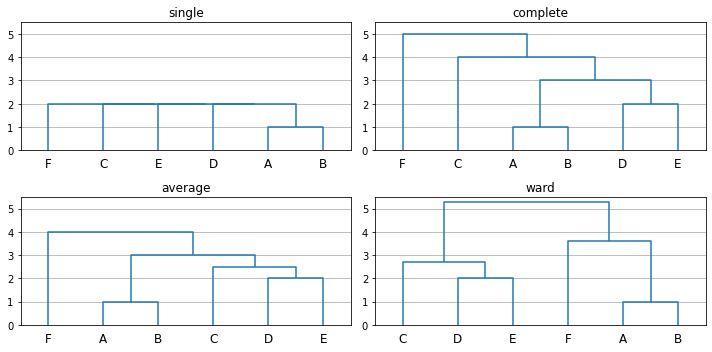

In [4]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [5]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [6]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [7]:
d1

array([[0., 1., 1., 5., 5.],
       [1., 0., 3., 5., 5.],
       [1., 3., 0., 3., 1.],
       [5., 5., 3., 0., 1.],
       [5., 5., 1., 1., 0.]])

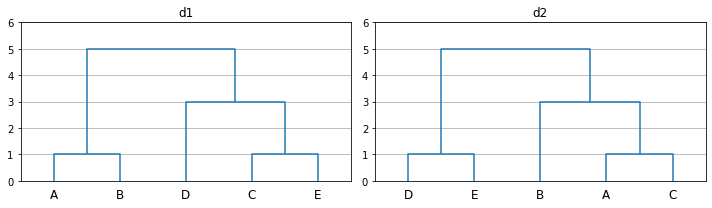

In [8]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

In [9]:
from sklearn.cluster import KMeans

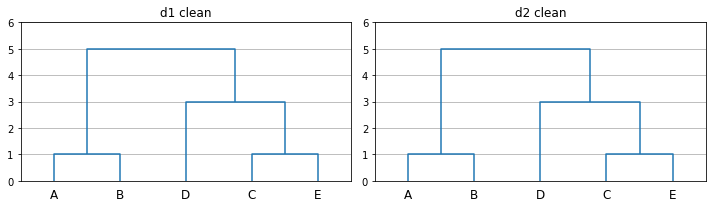

In [33]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.
d1_vec = d1.reshape(25,1)
est = KMeans(4, random_state=2020)
est.fit(d1_vec)
y_pred_KMeans1 = est.predict(d1_vec) 
for c in np.unique(y_pred_KMeans1):
    d1_vec[np.where(y_pred_KMeans1==c)] = d1_vec[np.where(y_pred_KMeans1==c)].mean()
d1_clean = d1_vec.reshape(5,5)

d2_vec = d2.reshape(25,1)
est = KMeans(4, random_state=2020)
est.fit(d2_vec)
y_pred_KMeans2 = est.predict(d2_vec) 
for c in np.unique(y_pred_KMeans2):
    d2_vec[np.where(y_pred_KMeans2==c)] = d2_vec[np.where(y_pred_KMeans2==c)].mean()
d2_clean = d2_vec.reshape(5,5)

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    d_vec = d.reshape(25,1)
    est = KMeans(4, random_state=2020)
    y_pred = est.fit_predict(d_vec)
    centers = est.cluster_centers_
    d_clean = centers[y_pred].reshape(5,5)
    
    plt.subplot(1, 2, i+1)
    plt.title('d%s clean' % (i+1,))

    lnk = hierarchy.linkage(squareform(d_clean), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [12]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
df[:10]
df.shape

(1156, 41)

In [13]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [14]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [15]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'ward')

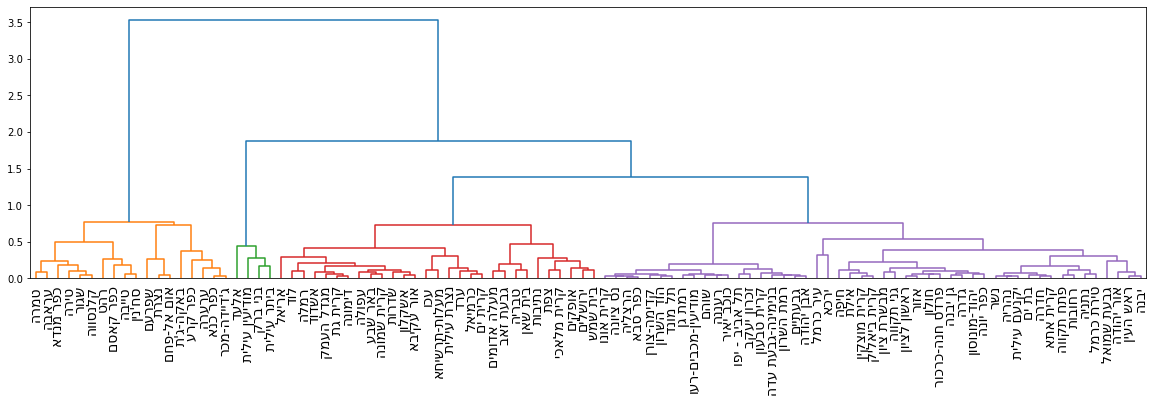

In [16]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.9);

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

In [17]:
from sklearn.preprocessing import normalize

In [18]:
# choose only parties that won seats 
party_names_main = ['Kadima','Likud','IsraelBeytenu','Avoda','Shas','YahadutHatora','Raam',
                    'IhudLeumi','Hadash','Merez','BaitYehudi','Balad']

In [36]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 1156

# adjusting the matrix
df_T = df[:n][party_names_main].transpose()

# Data matrix and labels list (41 columns - metadata ones)
labels_p = df_T.index.tolist()

# Normalize rows (so they represent proportions):
df_T = pd.DataFrame(normalize(df_T, norm='l2'))


In [37]:
lnk2 = hierarchy.linkage(df_T, 'average')

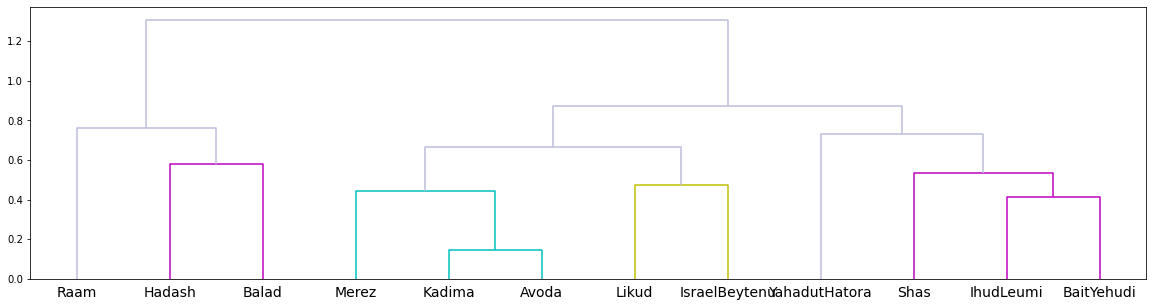

In [38]:
hierarchy.set_link_color_palette(['m', 'c','y'])
plt.figure(figsize=(20, 5))
dn = hierarchy.dendrogram(lnk2, labels=labels_p, leaf_font_size=14, above_threshold_color='#bcbddc', color_threshold=0.6)
plt.show()

**Explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?** 

Overall we managed to seperate the parties to right and left wing. However we can see that the big jewish left-center parties - Merez, Kadima and Avoda - are closer to the right wing parties than to the arab ones which may be closer to them in agenda. 

These gaps may be caused by the fact that our main feature is the votes per city, and therfore the main seperation for clustering is determined by the religious mahority of a city.

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [22]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

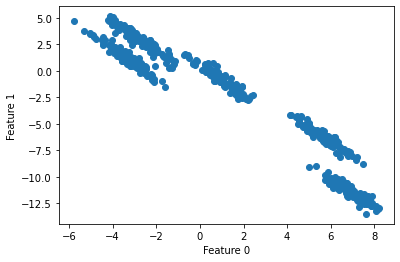

In [23]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

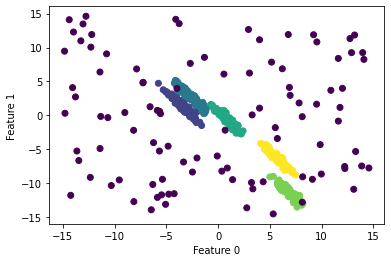

In [24]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

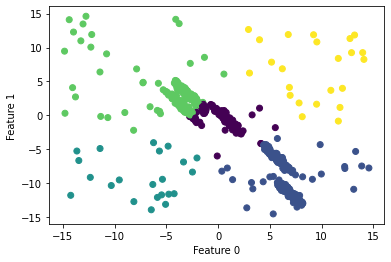

In [25]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [26]:
from sklearn.neighbors import NearestNeighbors
from scipy.signal import savgol_filter 
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score, contingency_matrix
from sklearn.cluster import DBSCAN


In [27]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y.iloc[labeled_samples,0].head()

596   -1
52     1
190    1
165    4
344    4
Name: 0, dtype: int32

For epsilon = 0.8 ==> similarity score= 0.0376
For epsilon = 0.9 ==> similarity score= 0.3961
For epsilon = 1.0 ==> similarity score= 0.5534
For epsilon = 1.1 ==> similarity score= 0.7190
For epsilon = 1.2 ==> similarity score= 0.7631
For epsilon = 1.3 ==> similarity score= 0.7802
For epsilon = 1.4 ==> similarity score= 0.7802
For epsilon = 1.5 ==> similarity score= 0.5385
For epsilon = 1.6 ==> similarity score= 0.5385
For epsilon = 1.7 ==> similarity score= 0.5385
For epsilon = 1.8 ==> similarity score= 0.5482
For epsilon = 1.9 ==> similarity score= 0.5482
For epsilon = 2.0 ==> similarity score= 0.4419
For epsilon = 2.1 ==> similarity score= 0.4419
For epsilon = 2.2 ==> similarity score= 0.4419
For epsilon = 2.3 ==> similarity score= 0.4419
For epsilon = 2.4 ==> similarity score= 0.4419
For epsilon = 2.5 ==> similarity score= 0.1102
For epsilon = 2.6 ==> similarity score= 0.1102
For epsilon = 2.7 ==> similarity score= 0.1102
For epsilon = 2.8 ==> similarity score= 0.1102
For epsilon =

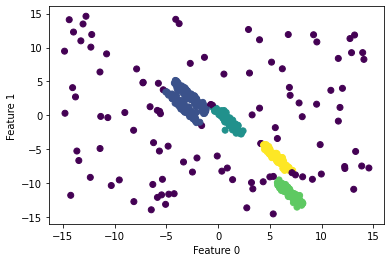

In [34]:
# minPts are given and are not required to be estimated.
# Yet, in the cells after completing the task feel free to play with it and get better result if you can!
minPts = 50 

# YOUR CODE HERE - keep results in this cell
eps_arr = np.arange(0.8,3,0.1) 
scores = []
for eps_i in eps_arr:
    db = DBSCAN(eps=eps_i, min_samples=minPts).fit(X)
    labels = db.labels_
    score = adjusted_rand_score(y.iloc[labeled_samples,0].values,labels[labeled_samples])
    scores.append(score)
    print("For epsilon = %.1f ==> similarity score= %.4f" %(eps_i,score))

eps_opt = eps_arr[np.argmax(scores)]
print("==>> Best value for epsilon is %.1f" %eps_opt)

db = DBSCAN(eps=eps_opt, min_samples=minPts)
db.fit(X)

plot(X.values,db.labels_)


In [35]:
len(eps_arr)

22

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

**Answer:** We iterated over 22 epsilon values. To narrow down the search we could have calculated the mean distance between neighbouring samples and use the elbow method as follows:

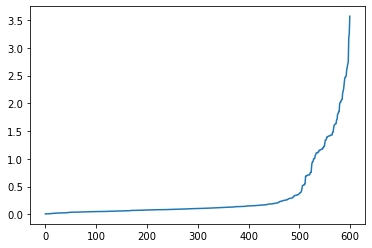

In [31]:
# k-distance graph using NearestNeighbors

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## Challenge 2.2


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

In [32]:
# Purity calculation here
def purity_score(y_true, y_pred):
    """Purity score

    To compute purity, each cluster is assigned to the class which is most frequent 
    in the cluster [1], and then the accuracy of this assignment is measured by counting 
    the number of correctly assigned documents and dividing by the number of documents.
    We suppose here that the ground truth labels are integers, the same with the predicted clusters i.e
    the clusters index.

    Args:
        y_true(np.ndarray): n*1 matrix Ground truth labels
        y_pred(np.ndarray): n*1 matrix Predicted clusters
    
    Returns:
        float: Purity score
    
    References:
        [1] https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
    """
    purity_counts = 0
    for label in np.unique(y_pred):
        # find values of y_true for points in each found cluster 
        cluster_true_labels = y_true[np.where(y_pred==label)]
        # take the most frequent true value for the cluste
        (values,counts) = np.unique(cluster_true_labels,return_counts=True)
        purity_counts += np.max(counts)
    purity_score = purity_counts / y_true.shape[0]
    return purity_score



# Purity of the small labeled set you were given
y_true = y.iloc[labeled_samples,0].values
y_pred = db.labels_[labeled_samples]
print("The small labeled sample purity score is: %.3f" %purity_score(y_true,y_pred))

# Purity of the rest of the data (not including the set from 1)
y_true = y.drop(labeled_samples).values
y_pred = np.delete(db.labels_,labeled_samples)
print("The rest of the data purity score is: %.3f" %purity_score(y_true,y_pred))

# Purity of the whole data together 
print("The whole data purity score is: %.3f" %purity_score(y.values, db.labels_))

The small labeled sample purity score is: 0.820
The rest of the data purity score is: 0.813
The whole data purity score is: 0.813


Overfitting happens when the model fits the training dataset more than it fits the underlying distribution. In this example we see that the model performance for the rest of the data is slightly worse than the performance for the labeled subset (as measured by a purity score of 0.813 vs 0.82 respectively). However, since the difference is very small we can't determine that there is indeed an overfit in this case.




# Good Luck and Enjoy Learning Machine Learning!

